<a href="https://colab.research.google.com/github/anslemhuncho/MACHINE-LEARNING-PROJECT/blob/main/EDA!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import random

In [ ]:
# Path to your dataset directory
dataset_dir = '/content/drive/MyDrive/SensitiveScene'


In [ ]:
# Path to create directories for train, validation, and test splits
train_dir = '/content/drive/MyDrive/crowd/train'
val_dir = '/content/drive/MyDrive/crowd/val'
test_dir = '/content/drive/MyDrive/crowd/test'

# Create train, validation, and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
# Define the ratios for train-validation-test split (e.g., 65% train, 25% validation, 15% test)
train_ratio = 0.65
val_ratio = 0.25
test_ratio = 0.15

In [ ]:
# Iterate over each class folder
for class_name in os.listdir(dataset_dir):
    class_folder = os.path.join(dataset_dir, class_name)
    # Create class directories in train, validation, and test splits
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    # List all images in the class folder
    images = os.listdir(class_folder)
    # Shuffle the images randomly
    random.shuffle(images)
    # Calculate the split indices
    train_index = int(len(images) * train_ratio)
    val_index = int(len(images) * (train_ratio + val_ratio))
    # Split the images into train, validation, and test sets
    train_images = images[:train_index]
    val_images = images[train_index:val_index]
    test_images = images[val_index:]
    # Move images to their respective directories
    for img in train_images:
        src = os.path.join(class_folder, img)
        dest = os.path.join(train_dir, class_name, img)
        shutil.copy(src, dest)
    for img in val_images:
        src = os.path.join(class_folder, img)
        dest = os.path.join(val_dir, class_name, img)
        shutil.copy(src, dest)
    for img in test_images:
        src = os.path.join(class_folder, img)
        dest = os.path.join(test_dir, class_name, img)
        shutil.copy(src, dest)

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Define path to training data. This is what u focus your EDA on
train_dir = '/content/drive/MyDrive/crowd/train'


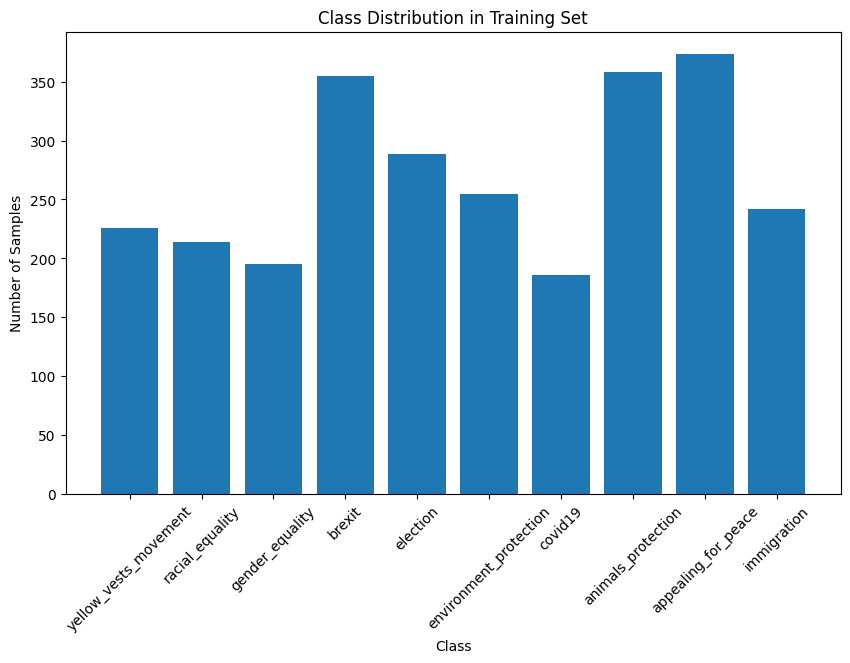

In [ ]:
#Explore class distribution
class_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name)))
                for class_name in os.listdir(train_dir)}

plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Set')
plt.xticks(rotation=45)
plt.show()


Class: yellow_vests_movement


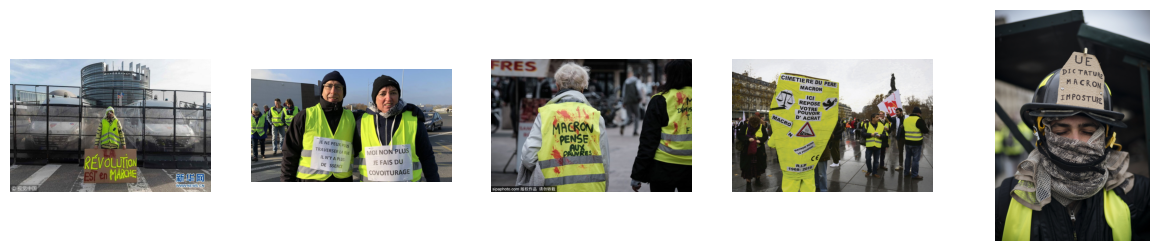

Class: racial_equality


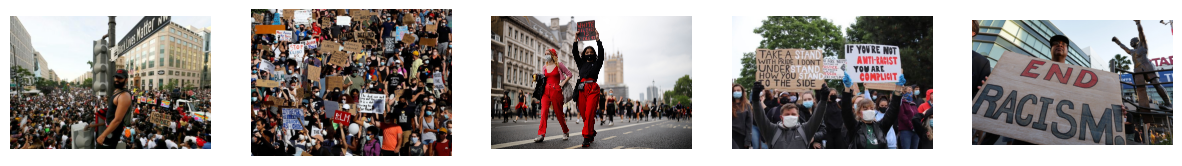

Class: gender_equality


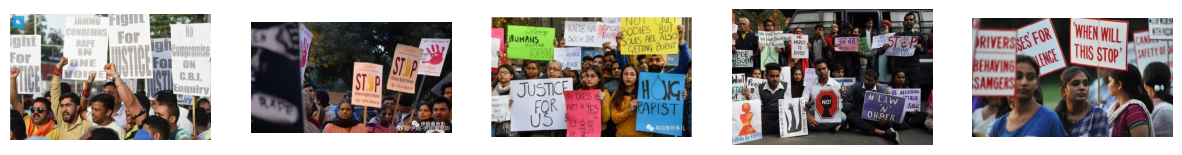

Class: brexit


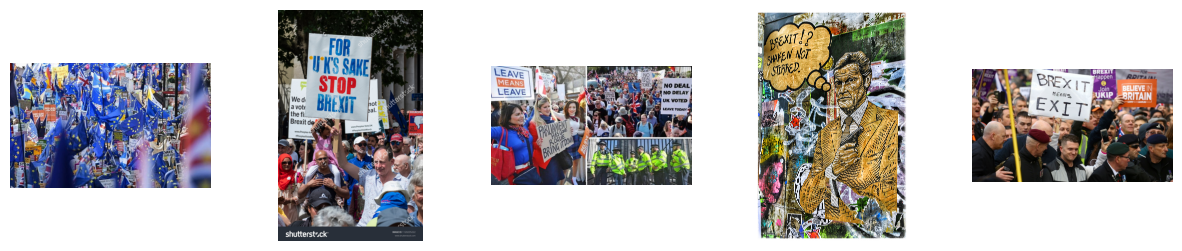

Class: election


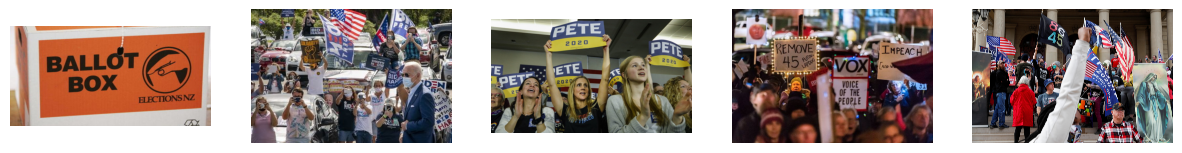

Class: environment_protection


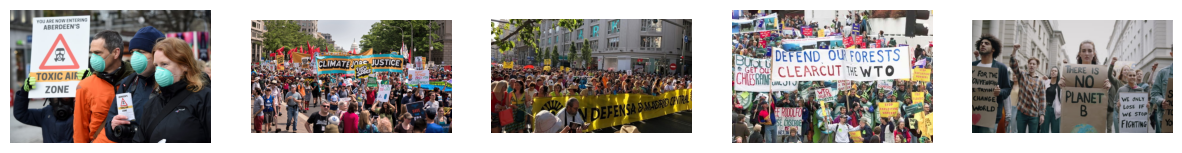

Class: covid19


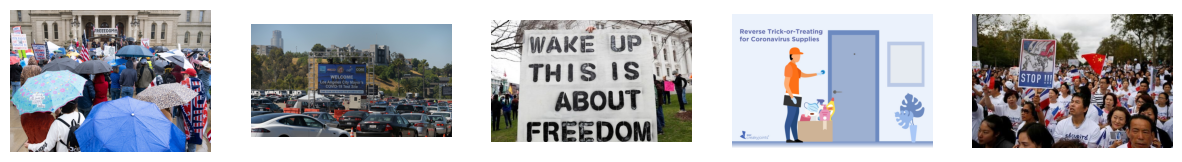

Class: animals_protection


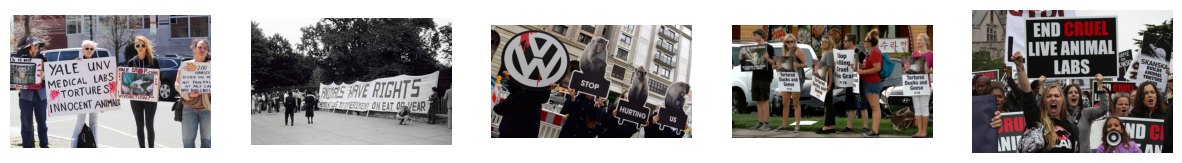

Class: appealing_for_peace


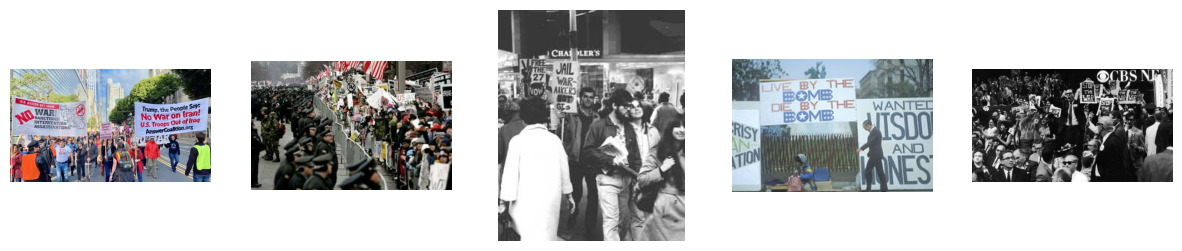

Class: immigration


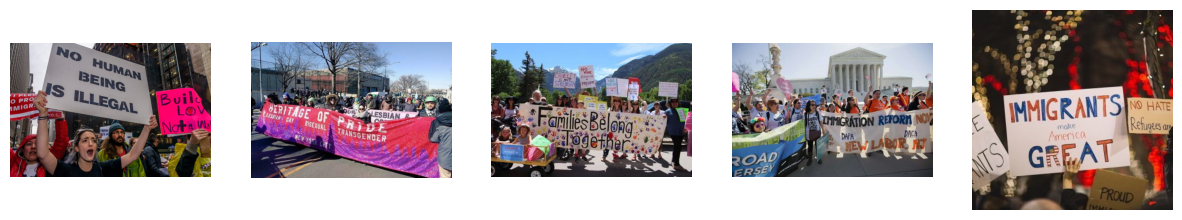

In [ ]:
#Display sample images from each class
def display_samples(class_folder, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    class_images = os.listdir(class_folder)[:num_samples]
    for i, image_name in enumerate(class_images):
        img = cv2.imread(os.path.join(class_folder, image_name))
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
    plt.show()

# Display samples from each class in the training set
for class_name in os.listdir(train_dir):
    class_folder = os.path.join(train_dir, class_name)
    print(f"Class: {class_name}")
    display_samples(class_folder)


Class: yellow_vests_movement


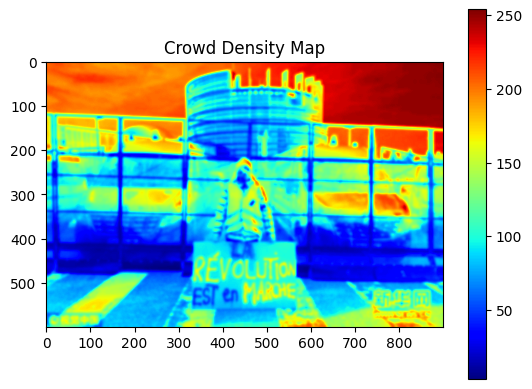

Class: racial_equality


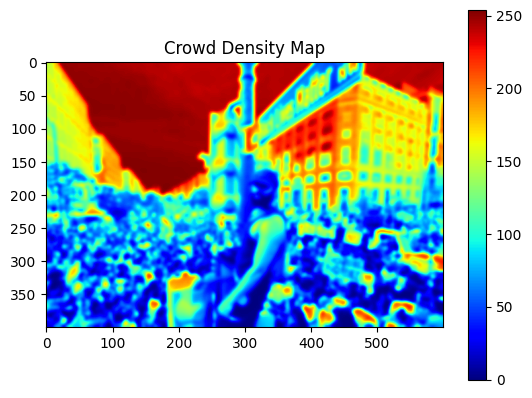

Class: gender_equality


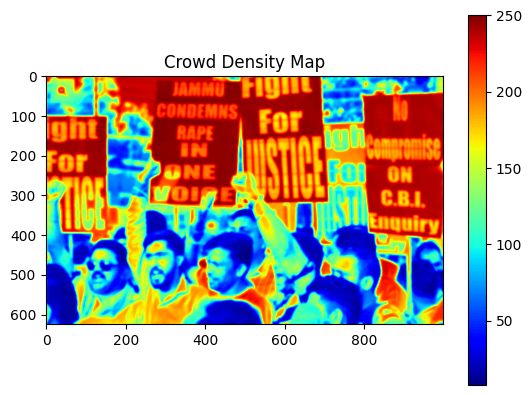

Class: brexit


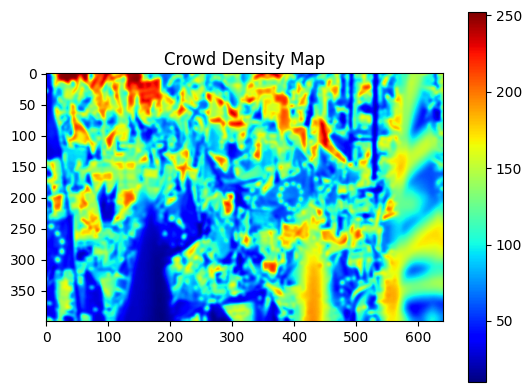

Class: election


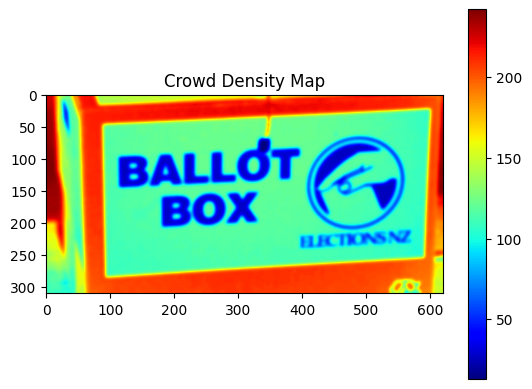

Class: environment_protection


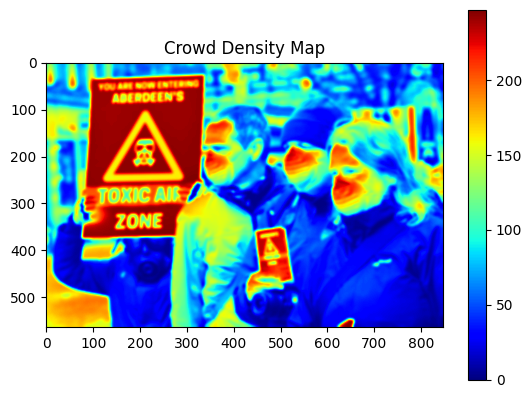

Class: covid19


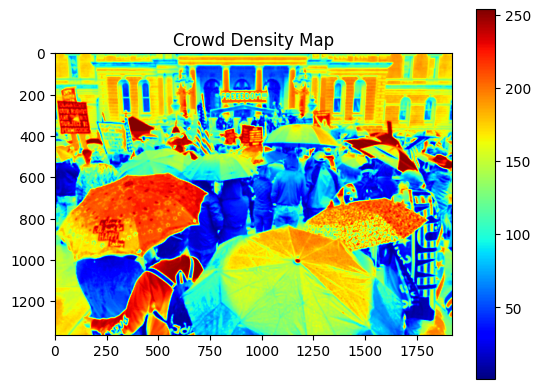

Class: animals_protection


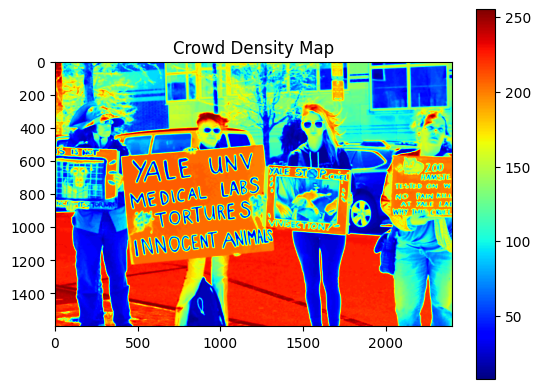

Class: appealing_for_peace


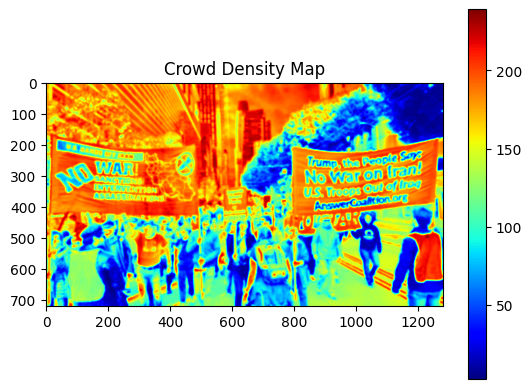

Class: immigration


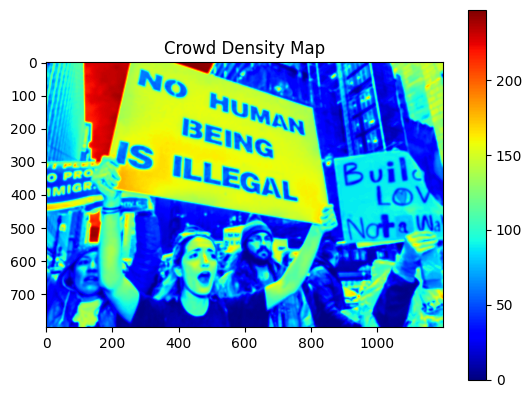

In [ ]:
#Crowd density estimation on sample images from each class
import cv2
import matplotlib.pyplot as plt

# Function to calculate crowd density map using Gaussian blur
def calculate_density_map(image_path):
    img = cv2.imread(image_path, 0)  # Read image as grayscale
    img = cv2.GaussianBlur(img, (15, 15), 0)  # Apply Gaussian blur for smoother density map
    return img

# Path to your dataset directory
dataset_dir = '/content/drive/MyDrive/crowd/train'

# Display density maps for sample images from each class
for class_name in os.listdir(dataset_dir):
    class_folder = os.path.join(dataset_dir, class_name)
    print(f"Class: {class_name}")
    sample_image = os.path.join(class_folder, os.listdir(class_folder)[0])  # Take the first image as sample
    density_map = calculate_density_map(sample_image)
    plt.imshow(density_map, cmap='jet')
    plt.colorbar()
    plt.title('Crowd Density Map')
    plt.show()


In [ ]:
#HoG for a sample image in each class
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate HoG features for an image
def calculate_hog(image):
    win_size = (64, 64)  # Define the window size for HoG calculation
    block_size = (16, 16)  # Define the block size for HoG calculation
    block_stride = (8, 8)  # Define the block stride for HoG calculation
    cell_size = (8, 8)  # Define the cell size for HoG calculation
    nbins = 9  # Number of bins for HoG calculation

    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    hog_features = hog.compute(image)
    return hog_features

# Path to your dataset directory
dataset_dir = '/content/drive/MyDrive/crowd/train'

# Display HoG features for sample images from each class
for class_name in os.listdir(dataset_dir):
    class_folder = os.path.join(dataset_dir, class_name)
    print(f"Class: {class_name}")
    sample_image_path = os.path.join(class_folder, os.listdir(class_folder)[0])  # Take the first image as sample
    sample_image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate HoG features for the sample image
    hog_features = calculate_hog(sample_image)

    # Visualize HoG features
    plt.figure(figsize=(8, 6))
    plt.bar(np.arange(len(hog_features)), hog_features.squeeze())
    plt.title('HoG Features')
    plt.xlabel('Feature Index')
    plt.ylabel('Magnitude')
    plt.show()


Class: yellow_vests_movement


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Mean crowd density for each class
# Calculate mean crowd density for each class
# Path to your dataset directory
dataset_dir = '/content/drive/MyDrive/crowd/train'
mean_densities = {}
for class_name in os.listdir(dataset_dir):
    class_folder = os.path.join(dataset_dir, class_name)
    densities = []
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        density_map = calculate_density_map(image_path)
        mean_density = np.mean(density_map)
        densities.append(mean_density)
    mean_densities[class_name] = np.mean(densities)

# Display mean crowd densities
print("Mean Crowd Densities:")
for class_name, mean_density in mean_densities.items():
    print(f"{class_name}: {mean_density}")


Mean Crowd Densities:
yellow_vests_movement: 111.58638501652298
racial_equality: 108.72754061994712
gender_equality: 109.02965924697838
brexit: 107.46715112002859
election: 102.94047134970235
environment_protection: 114.45371683219487
covid19: 118.84897494537556
animals_protection: 114.16058992748377
appealing_for_peace: 113.77575300190443
immigration: 113.27403905318008


In [ ]:
# Calculate standard deviation and coefficient of variation for crowd density in each class
std_devs = {}
coeff_of_vars = {}
for class_name in os.listdir(dataset_dir):
    class_folder = os.path.join(dataset_dir, class_name)
    densities = []
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        density_map = calculate_density_map(image_path)
        mean_density = np.mean(density_map)
        densities.append(mean_density)
    std_dev = np.std(densities)
    coeff_of_var = np.std(densities) / np.mean(densities)  # Coefficient of variation = SD / mean
    std_devs[class_name] = std_dev
    coeff_of_vars[class_name] = coeff_of_var

# Display standard deviations and coefficients of variation
print("Standard Deviations:")
for class_name, std_dev in std_devs.items():
    print(f"{class_name}: {std_dev}")

print("\nCoefficients of Variation:")
for class_name, coeff_of_var in coeff_of_vars.items():
    print(f"{class_name}: {coeff_of_var}")


Standard Deviations:
yellow_vests_movement: 24.07899279871716
racial_equality: 24.063324263064402
gender_equality: 28.515455752862383
brexit: 21.07031513572713
election: 29.406146741356846
environment_protection: 24.22342071250146
covid19: 31.325512547821987
animals_protection: 23.474013860018275
appealing_for_peace: 23.273618304680966
immigration: 23.47085075254285

Coefficients of Variation:
yellow_vests_movement: 0.2157879099242412
racial_equality: 0.22131765444025644
gender_equality: 0.2615385203421394
brexit: 0.19606284260940338
election: 0.2856616679115475
environment_protection: 0.21164381011772976
covid19: 0.26357410791485225
animals_protection: 0.20562274489759785
appealing_for_peace: 0.20455692615184362
immigration: 0.20720414800008782


In [ ]:
import cv2
import os

# Define input and output directories for training, validation, and testing sets
train_input_dir = '/content/drive/MyDrive/crowd/train'
val_input_dir = '/content/drive/MyDrive/crowd/val'
test_input_dir = '/content/drive/MyDrive/crowd/test'
output_dir = '/content/drive/MyDrive/normal'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)


In [ ]:

# Define target image size
target_size = (254, 254)  # Example: (height, width)

In [ ]:
# Function to preprocess images
def preprocess_images(input_dir, output_dir):
    # Loop through each class directory
    for class_name in os.listdir(input_dir):
        class_input_dir = os.path.join(input_dir, class_name)
        class_output_dir = os.path.join(output_dir, class_name)
        os.makedirs(class_output_dir, exist_ok=True)

        # Loop through each image in the class directory
        for image_name in os.listdir(class_input_dir):
            # Read image
            image_path = os.path.join(class_input_dir, image_name)
            img = cv2.imread(image_path)

            # Resize image
            resized_img = cv2.resize(img, target_size)

            # Normalize image (assuming RGB image)
            normalized_img = resized_img / 255.0

            # Save preprocessed image
            output_path = os.path.join(class_output_dir, image_name)
            cv2.imwrite(output_path, normalized_img)